In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import pandas as pd
from zipfile import ZipFile

In [2]:
with ZipFile('cities.zip') as f: 
    data = pd.read_csv(f.open('cities.csv'))
data_pop = data[data['Population'] >= 1000000]
data_pop

,Longitude deg,Longitude min,Longitude sec,Latitude deg,Latitude min,Latitude sec,Population,Country,Capital,Name
0,55,45,21,37,37,4,12506468,Russia,1,Moscow
1,40,43,42,-73,-59,-39,8405837,USA,0,New York
3,34,2,0,-118,-16,0,3976322,USA,0,Los Angeles
5,-37,-49,-14,144,57,41,4529500,Australia,0,Melbourne
6,-33,-27,0,-70,-40,0,5128590,Chile,1,Santiago
7,39,56,0,116,24,0,21705000,China,1,Beijing
8,31,10,0,121,28,0,24152700,China,0,Shanghai
9,23,7,39,113,14,50,14000000,China,0,Guangzhou
10,23,42,0,90,22,0,6970105,Bangladesh,1,Dhaka
11,24,51,36,67,0,36,23500000,Pakistan,0,Karachi


In [3]:
with open('world.jpg', 'rb') as f: 
    mymap = plt.imread(f)

In [4]:
mymap.shape

(644, 1280, 3)

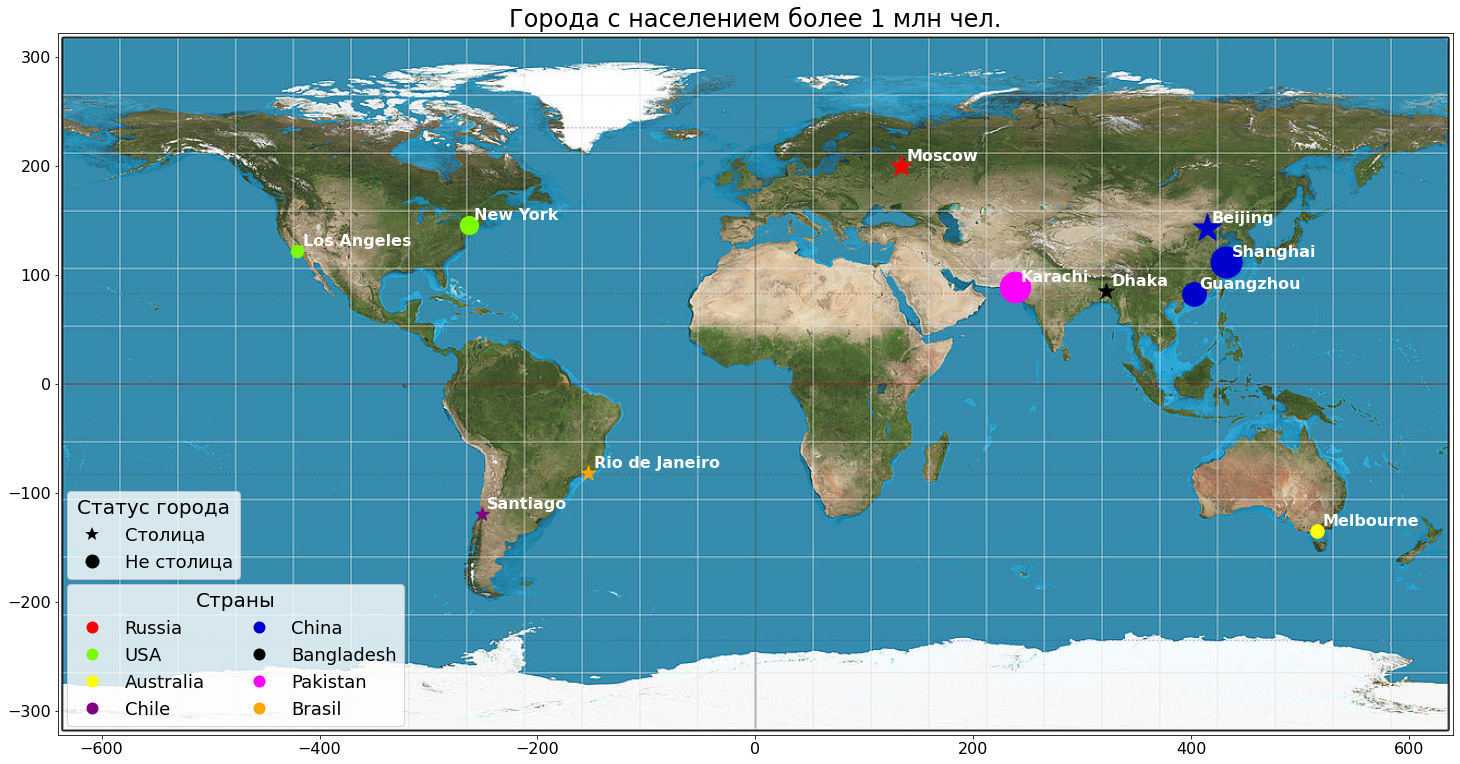

In [5]:
plt.figure(figsize=(25, 21))
plt.imshow(mymap, extent=[-mymap.shape[1]/2, mymap.shape[1]/2, -mymap.shape[0]/2, mymap.shape[0]/2])

x = (data_pop['Latitude deg'] + data_pop['Latitude min']/60 + data_pop['Latitude sec'] / 3600)*mymap.shape[1]/2 / 180
y = (data_pop['Longitude deg'] + data_pop['Longitude min'] / 60 + data_pop['Longitude sec'] / 3600)*mymap.shape[0]/2 / 90
ms = ['*' if cap == 1 else 'o' for cap in data_pop['Capital']]
mycmap = {'Russia':'red', 'USA': 'lawngreen', 'Australia': 'yellow', 'Chile': 'purple',
          'China': 'mediumblue','Bangladesh': 'black', 'Pakistan': 'magenta', 'Brasil': 'orange'}

for i in range(len(x)): 
    plt.scatter(x.iloc[i], y.iloc[i], marker=ms[i], s=data_pop['Population'].iloc[i]/25000, color=mycmap[data_pop['Country'].iloc[i]])

plt.title('Города с населением более 1 млн чел.', fontsize=24)


#создаю псевдографикb для легенд
legend_elems = [Line2D([0], [0], label=country, markerfacecolor=mycmap[country], marker='o', lw=0, mew=0, markersize=12) 
                for country in mycmap.keys()]

leg1 = plt.legend(handles=legend_elems, fontsize=18, loc='lower left', ncol=2, title='Страны', title_fontsize=20)

legend_elems2 = [Line2D([0], [0], label=status, marker=m, lw=0, mew=0, markersize=14, color='black') 
                 for status, m in zip(['Столица', 'Не столица'], ['*', 'o'])]
ax = plt.gca().add_artist(leg1)
plt.legend(handles=legend_elems2, bbox_to_anchor=(0.137, 0.36), fontsize=18, title='Статус города', title_fontsize=20)
plt.tick_params(labelsize=16)


#подписи
for i in range(len(x)): 
    plt.text(x.iloc[i] + 5, y.iloc[i] + 5, s=data_pop['Name'].iloc[i], fontsize=16, color='w', weight='bold')

plt.savefig('citymap.svg')